# Assignment-3

**By K.Sai Somanath, 18MCMT28, M.Tech, CS.**

## Question 1

#### Implement the K-means algorithm

In [6]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [78]:
def k_means(data, k, y):
    centroids = data[np.random.choice(data.shape[0], k, replace=False), :]
    print(centroids)
    clusters = np.array([])
    Y = np.full(data.shape[0], -1)
    
    while np.array_equal(clusters, Y) is False:
        for i in range(data.shape[0]):
            Y[i] = np.argmin(np.linalg.norm(centroids - data[i], axis=1))
        
        clusters = Y.copy()
        
        for i in range(k):
            var = data[Y == i]
            if var.size:
                centroids[i] = np.mean(var, axis=0)
            
    return np.array([data[clusters == x] for x in range(k)]), centroids, np.array([y[clusters == x] for x in range(k)])

#### Applying K-means on Iris dataset

[[ 1.80234045 -0.21615461 -0.03769533]
 [-2.3105317   0.39786782 -0.23369561]
 [ 0.13499495 -0.31170964 -0.1749733 ]]


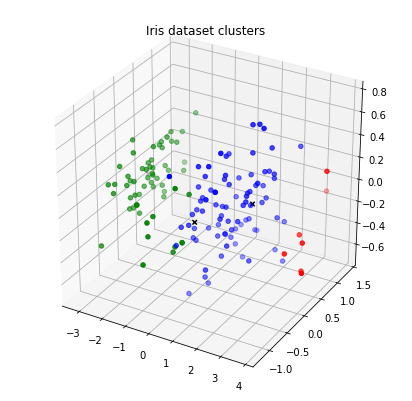

In [82]:
# Read the data
iris = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3))
pca = PCA(n_components=3)
pca.fit(iris)
X_iris = pca.transform(iris)

clusters_iriss_iris, centroids_iris, labels_iris = k_means(X_iris, 3, np.array([0] * 50 + [1] * 50 + [2] * 50))

# Show the Iris clusters_iriss
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters_iris[0][:, 0], clusters_iris[0][:, 1], clusters_iris[0][:, 2], c='r')
ax.scatter(clusters_iris[1][:, 0], clusters_iris[1][:, 1], clusters_iris[1][:, 2], c='g')
ax.scatter(clusters_iris[2][:, 0], clusters_iris[2][:, 1], clusters_iris[2][:, 2], c='b')
ax.scatter(centroids_iris[:, 0], centroids_iris[:, 1], centroids_iris[:, 2], c='k', marker='x')

plt.title('Iris dataset clusters')
plt.show()

#### Applying K means on Cancer dataset

[[ 56.63828126   0.72380407   6.96890768]
 [-48.03889594 -28.52505087  -0.72684424]]


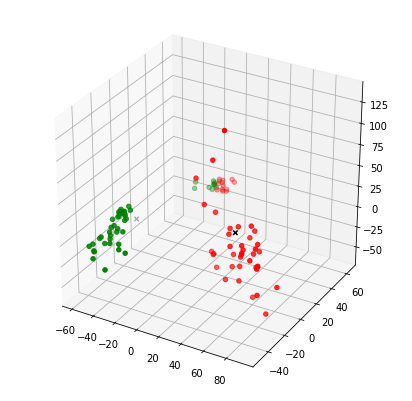

In [91]:
file_handle = open('arcene_train.data')
arcene = np.array([list(map(float, file_handle.readline().strip().split(' '))) for _ in range(100)], dtype=np.float64)
arcene_std = StandardScaler().fit_transform(arcene)
pca = PCA(n_components=3)
pca.fit(arcene_std)
X_cancer = pca.transform(arcene_std)

file = open('arcene_train.labels')
y = np.array([max(0, int(file.readline().strip())) for _ in range(100)])

clusters_cancer, centroids_cancer, labels_cancer = k_means(X_cancer, 2, y)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters_cancer[0][:, 0], clusters_cancer[0][:, 1], clusters_cancer[0][:, 2], c='r')
ax.scatter(clusters_cancer[1][:, 0], clusters_cancer[1][:, 1], clusters_cancer[1][:, 2], c='g')
ax.scatter(centroids_cancer[:, 0], centroids_cancer[:, 1], centroids_cancer[:, 2], c='k', marker='x')
plt.show()

#### Applying K means to the Wine dataset

[[-2.94929937 -1.55530896 -0.98340073]
 [ 1.65768181  0.9567122   1.95258422]
 [-0.55572283  2.65754004  0.8491269 ]]


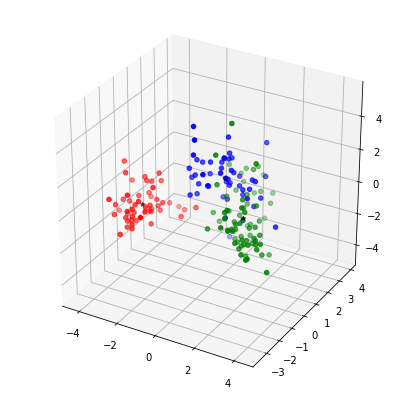

In [116]:
file_handle = open('wine.data')
wine = np.array([list(map(float, file_handle.readline().strip().split(','))) for _ in range(178)], dtype=np.float64)
wine_labels = (wine[:, 0] - 1).astype('int64')
wine = wine[:, 1:]
wine_std = StandardScaler().fit_transform(wine)
pca = PCA(n_components=3)
pca.fit(wine_std)
X_wine = pca.transform(wine_std)

clusters_wine, centroids_wine, labels_wine = k_means(X_wine, 3, wine_labels)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters_wine[0][:, 0], clusters_wine[0][:, 1], clusters_wine[0][:, 2], c='r')
ax.scatter(clusters_wine[1][:, 0], clusters_wine[1][:, 1], clusters_wine[1][:, 2], c='g')
ax.scatter(clusters_wine[2][:, 0], clusters_wine[2][:, 1], clusters_wine[2][:, 2], c='b')
ax.scatter(centroids_wine[:, 0], centroids_wine[:, 1], centroids_wine[:, 2], c='k', marker='*')
plt.show()

## Question 2

### Clusters Validations

Clustering validation, which evaluates the goodness of clustering results. External clustering validation and internal clustering validation are the two main categories of clustering validation.

The main difference is whether or not external information is used for clustering validation. Unlike external validation measures, which use external information not present in the data, internal validation measures only rely on information in the data.

The internal measures evaluate the goodness of a clustering structure without respect to external information. Since external validation measures know the “true” cluster number in advance, they are mainly used for choosing an optimal clustering algorithm on a specific data set.

On the other hand, internal validation measures can be used to choose the best clustering algorithm as well as the optimal cluster number without any additional information.

In practice, external information such as class labels is often not available in many application scenarios. Therefore, in the situation that there is no external information available, internal validation measures are the only option for cluster validation.

---

### Internal


In [70]:
def rmsstd(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
    numerator = np.sum(ssd)
    denominator = 0
    for i in range(k):
        for j in range(clusters[i][0].shape[1]):
            denominator += clusters[i][0].shape[0] - 1
    rmsstd_val = np.sqrt(numerator/denominator)
    return rmsstd_val

def rs(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    total_ssd = np.zeros(clusters.shape)
    
    means = []
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
        means.append(list(mean))
    ss_w = np.sum(ssd)
    total_mean = np.mean(means, axis = 0)
    for i in range(k):
        total_ssd[i] = np.sum((clusters[i][0] - total_mean)**2)
    ss_t = np.sum(total_ssd)
    
    rs_val = (ss_t - ss_w) / ss_t
    return rs_val

In [71]:
print("Iris Dataset - RMSSTD: ", rmsstd(clusters_iris.reshape(clusters_iris.shape[0],1)))
print("Iris Dataset - RS: ", rs(clusters_iris.reshape(clusters_iris.shape[0],1)))

print("Cancer Dataset - RMSSTD: ", rmsstd(clusters_cancer.reshape(clusters_cancer.shape[0],1)))
print("Cancer Dataset - RS: ", rs(clusters_cancer.reshape(clusters_cancer.shape[0],1)))

print("Wine Dataset - RMSSTD: ", rmsstd(clusters_wine.reshape(clusters_wine.shape[0],1)))
print("Wine Dataset - RS: ", rs(clusters_wine.reshape(clusters_wine.shape[0],1)))

Iris Dataset - RMSSTD:  0.5550009624083846
Iris Dataset - RS:  0.8268628032700636
Cancer Dataset - RMSSTD:  26.966811031509433
Cancer Dataset - RS:  0.45670518579511116
Wine Dataset - RMSSTD:  1.00639064615924
Wine Dataset - RS:  0.6567834985686671


---
### External

In [119]:
def purity(y, k, class_count):
    sum = 0
    for i in range(k):
        counts = np.bincount(y[i])
        label = np.argmax(counts)
        max_occurances = counts[label]
        sum += min(class_count[i], max_occurances)
    return sum / np.sum(class_count)

def confusion_matrix(k, labels):
        cm = np.zeros((k, k), int)
        number_of_datapoints = np.sum([labels[i].size for i in range(k)])
        for i in range(k):
            counts = np.bincount(labels[i])
            target = np.argmax(counts)
            for label in labels[i]:
                cm[label, int(target)] += 1
        return cm

def precision(TP, FP):
    return np.around((TP/(TP+FP)),decimals=3)

def recall(TP, FN):
    return np.around((TP/(TP+FN)),decimals=3)


def f_measure(TP, FP, FN):
    precision_val = precision(TP, FP)
    recall_val = recall(TP, FN)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

def cm_metrics(cm):
    FP, FN, TN = [], [], []
    for i in range(cm.shape[0]):
        FP.append(sum(cm[:,i]) - cm[i,i])
        FN.append(sum(cm[i,:]) - cm[i,i])
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))
    return np.diag(cm),FP, FN, TN


#### Purity measure

In [117]:
print("Purity for Cancer", purity(labels_cancer, 2, [44, 56]))
print("Purity for Iris", purity(labels_iris, 3, [50, 50, 50]))
print("Purity for Wine", purity(labels_wine, 3, [59, 71, 48]))

Purity for Cancer 0.63
Purity for Iris 0.9066666666666666
Purity for Wine 0.8707865168539326


#### Confusion matrix, F-measure

In [122]:
cm = confusion_matrix(3, labels_iris)
print("Confusion Matrix for Iris data: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(labels_iris, 3, [50,50,50]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))

Confusion Matrix for Iris data: 
[[50  0  0]
 [ 0 37 13]
 [ 0  1 49]]
Purity:  0.9066666666666666
F-Measure:  [1.         0.84102684 0.87480226]
Average F-Measure:  0.9052763658977688


In [124]:
cm = confusion_matrix(3, labels_wine)
print("Confusion Matrix for Wine data: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(labels_wine, 3, [59, 71, 48]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))

Confusion Matrix for Wine data: 
[[59  0  0]
 [17 50  4]
 [ 0  0 48]]
Purity:  0.8707865168539326
F-Measure:  [0.87387387 0.82629108 0.9599584 ]
Average F-Measure:  0.886707784007338


### Kernel K-means for the Wine dataset

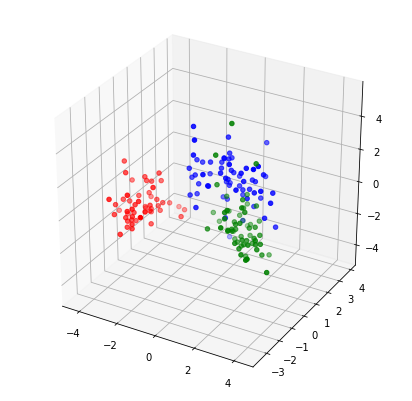

In [129]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=0).fit(X_wine)

cluster1 = X[clustering.labels_ == 0]
cluster2 = X[clustering.labels_ == 1]
cluster3 = X[clustering.labels_ == 2]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[:, 0], cluster1[:, 1], cluster1[:, 2], c='r')
ax.scatter(cluster2[:, 0], cluster2[:, 1], cluster2[:, 2], c='g')
ax.scatter(cluster3[:, 0], cluster3[:, 1], cluster3[:, 2], c='b')
